## 绘制日期索引的柱状图

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 读取 Excel 文件，假设文件名为 'data.xlsx'
file_path = 'data.xlsx'

# 读取 Excel 中的第一个 sheet
df = pd.read_excel(file_path)

# 假设日期列为 'Date'，人数列为 'People'
# 如果列名不同，请根据实际情况修改列名
expected_columns = ['Date', 'Number of reported results']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"Excel 文件中缺少必要的列。预期列：{expected_columns}，实际列：{df.columns}")

# 指定日期格式为 'YYYY/MM/DD'
date_format = '%Y/%m/%d'
df['Date'] = pd.to_datetime(df['Date'], format=date_format)  # 转换为日期类型
df.set_index('Date', inplace=True)  # 设置日期列为索引

# 检查数据是否有缺失值
if df.isnull().values.any():
    print("警告：数据中存在缺失值。")
    # 可以选择填充缺失值或删除包含缺失值的行
    # df.fillna(method='ffill', inplace=True)  # 前向填充缺失值
    # df.dropna(inplace=True)  # 删除包含缺失值的行

# 设置中文字体
# 首先，找到系统中可用的中文字体
# 这里我们假设 'SimHei' 字体可用，你可以根据实际情况替换为其他中文字体
font_path = fm.findfont(fm.FontProperties(family='TsangerJinKai04'))
plt.rcParams['font.sans-serif'] = ['TsangerJinKai04']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Number of reported results'], marker='o', linestyle='-', color='b')
plt.title('Wordle日期折线图')
plt.xlabel('日期')
plt.ylabel('提交结果')
plt.grid(True)
plt.xticks(rotation=45)  # 如果日期显示不清晰，可以旋转 x 轴标签
plt.tight_layout()  # 调整布局，避免标签重叠
plt.show()

## 使用ARIMA模型预测的时间序列

In [ ]:
# coding=utf-8
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.tsa.arima.model import ARIMA

# 读取 Excel 文件，假设文件名为 'data.xlsx'
file_path = 'data.xlsx'

# 读取 Excel 中的第一个 sheet
df = pd.read_excel(file_path)

# 假设日期列为 'Date'，人数列为 'People'
# 如果列名不同，请根据实际情况修改列名
expected_columns = ['Date', 'Number of reported results']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"Excel 文件中缺少必要的列。预期列：{expected_columns}，实际列：{df.columns}")

# 指定日期格式为 'YYYY/MM/DD'
date_format = '%Y/%m/%d'
df['Date'] = pd.to_datetime(df['Date'], format=date_format)  # 转换为日期类型

# 按照日期排序
df.sort_values(by='Date', inplace=True)

# 设置日期列为索引
df.set_index('Date', inplace=True)

# 检查数据是否有缺失值
if df.isnull().values.any():
    print("警告：数据中存在缺失值。")
    # 可以选择填充缺失值或删除包含缺失值的行
    # df.fillna(method='ffill', inplace=True)  # 前向填充缺失值
    # df.dropna(inplace=True)  # 删除包含缺失值的行

# 设置中文字体
# 首先，找到系统中可用的中文字体
# 这里我们假设 'SimHei' 字体可用，你可以根据实际情况替换为其他中文字体
font_path = fm.findfont(fm.FontProperties(family='TsangerJinKai04'))
plt.rcParams['font.sans-serif'] = ['TsangerJinKai04']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制原始数据的折线图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Number of reported results'], marker='o', linestyle='-', color='b', label='实际数据')
plt.title('Wordle日期折线图')
plt.xlabel('日期')
plt.ylabel('提交结果')
plt.grid(True)
plt.xticks(rotation=45)  # 如果日期显示不清晰，可以旋转 x 轴标签
plt.tight_layout()  # 调整布局，避免标签重叠

# 使用 ARIMA 模型进行时间序列预测
# 对数据进行一阶差分处理
df_diff = df['Number of reported results'].diff().dropna()

# 拟合 ARIMA 模型，这里使用 (1, 1, 0) 表示一阶差分
model = ARIMA(df_diff, order=(1, 3, 2))
model_fit = model.fit()

# 预测未来 30 天的数据
future_dates = pd.date_range(start=df.index[-1], periods=30, freq='D')
forecast_diff = model_fit.forecast(steps=30)

# 将差分预测结果还原为原始数据的预测结果
forecast = forecast_diff.cumsum() + df['Number of reported results'].iloc[-1]

# 打印预测数据
print(forecast)

# 绘制预测数据的折线图
plt.plot(future_dates, forecast, marker='o', linestyle='-', color='r', label='预测数据')
plt.legend()
plt.show()

警告：数据中存在缺失值。


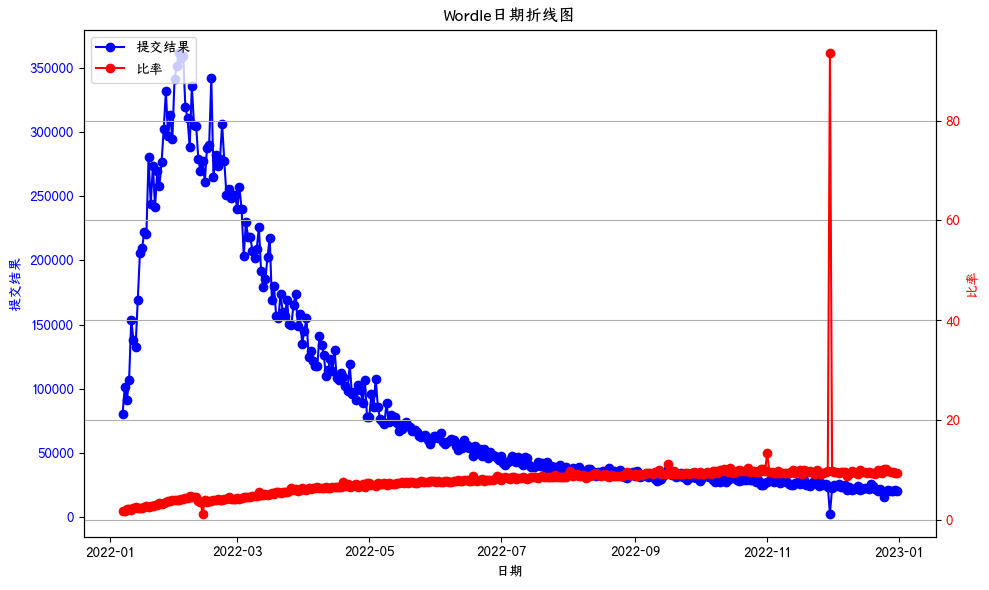

In [23]:
# coding=utf-8
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 读取 Excel 文件，假设文件名为 'data.xlsx'
file_path = 'data.xlsx'

# 读取 Excel 中的第一个 sheet
df = pd.read_excel(file_path)

# 假设日期列为 'Date'，人数列为 'People'，比率列为 'Ratio'
# 如果列名不同，请根据实际情况修改列名
expected_columns = ['Date', 'Number of reported results', 'Ratio']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"Excel 文件中缺少必要的列。预期列：{expected_columns}，实际列：{df.columns}")

# 指定日期格式为 'YYYY/MM/DD'
date_format = '%Y/%m/%d'
df['Date'] = pd.to_datetime(df['Date'], format=date_format)  # 转换为日期类型
df.set_index('Date', inplace=True)  # 设置日期列为索引

# 检查数据是否有缺失值
if df.isnull().values.any():
    print("警告：数据中存在缺失值。")
    # 可以选择填充缺失值或删除包含缺失值的行
    # df.fillna(method='ffill', inplace=True)  # 前向填充缺失值
    # df.dropna(inplace=True)  # 删除包含缺失值的行

# 设置中文字体
# 首先，找到系统中可用的中文字体
# 这里我们假设 'SimHei' 字体可用，你可以根据实际情况替换为其他中文字体
font_path = fm.findfont(fm.FontProperties(family='TsangerJinKai04'))
plt.rcParams['font.sans-serif'] = ['TsangerJinKai04']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制折线图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制提交结果的折线图
ax1.plot(df.index, df['Number of reported results'], marker='o', linestyle='-', color='b', label='提交结果')
ax1.set_xlabel('日期')
ax1.set_ylabel('提交结果', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个纵轴
ax2 = ax1.twinx()

# 绘制比率的折线图
ax2.plot(df.index, df['Ratio'], marker='o', linestyle='-', color='r', label='比率')
ax2.set_ylabel('比率', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 设置标题和网格
plt.title('Wordle日期折线图')
plt.grid(True)
plt.xticks(rotation=45)  # 如果日期显示不清晰，可以旋转 x 轴标签
plt.tight_layout()  # 调整布局，避免标签重叠

plt.show()
